<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas y Jose Alberto Mayagoitia Gutierrez.

**Fecha:** 21 de octubre del 2021.

**Expediente** : 714383 y 720266.
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/SPF_Tarea7_IArellano_JMayagoitia

# Tarea 8: Clase 22

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [55]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from math import log, sqrt, pi, exp
from scipy.stats import norm
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Código Iván

Put para el 21 de Enero del 2022

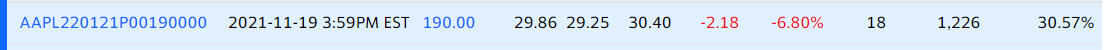

In [3]:
# Código Iván 

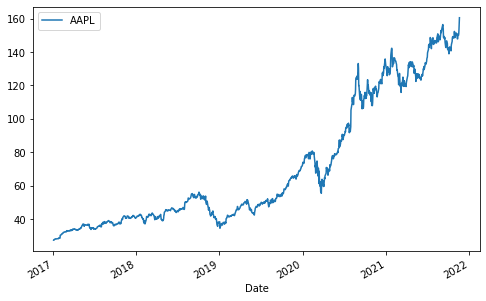

In [4]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [5]:
closes_aapl.iloc[-1]

Symbols
AAPL    160.55
Name: 2021-11-19 00:00:00, dtype: float64

In [6]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

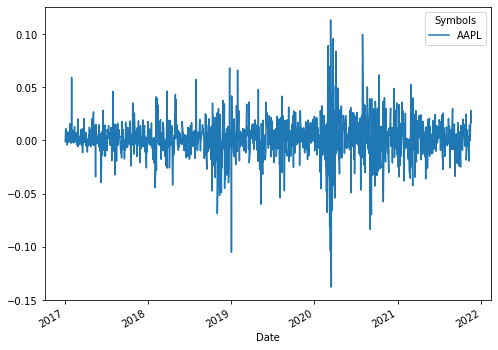

In [7]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [8]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-1.119e-03
2017-01-05,5.085e-03
2017-01-06,1.115e-02
2017-01-09,9.159e-03
2017-01-10,1.009e-03
...,...
2021-11-15,6.663e-05
2021-11-16,6.667e-03
2021-11-17,1.649e-02


In [9]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-01-21'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
                '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
                '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
                '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13',
                '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
                '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
                '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
                '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10',
                '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
                '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
                '2022-01-21'],
               dtype='datetime64[ns]', freq='B'),
 45)

In [10]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-22,6.208e-03,1.803e-02,2.360e-04,...,-1.922e-02,9.290e-03,-3.433e-02
2021-11-23,7.162e-05,-1.102e-04,2.923e-06,...,1.310e-04,1.356e-04,-6.574e-04
2021-11-24,3.949e-07,-9.230e-07,1.881e-08,...,-5.331e-08,-4.046e-07,1.614e-05
2021-11-25,6.885e-09,-1.096e-08,4.012e-10,...,-4.659e-10,-3.619e-09,-1.097e-07
2021-11-26,9.033e-11,-7.562e-11,-2.330e-11,...,1.257e-12,1.014e-11,-6.366e-10
...,...,...,...,...,...,...,...
2022-01-17,-2.548e-78,-1.259e-81,-4.541e-80,...,5.967e-84,-8.043e-80,2.653e-79
2022-01-18,-3.420e-81,1.321e-83,3.788e-83,...,-3.307e-86,-1.780e-81,6.248e-81
2022-01-19,1.051e-82,-1.425e-85,-9.750e-86,...,5.735e-88,-1.656e-83,-2.411e-82
2022-01-20,8.283e-85,-4.937e-88,-1.811e-87,...,-5.113e-91,-3.507e-85,-7.696e-84


In [11]:
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

Rendimiento Log:

In [12]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.15978624865366073

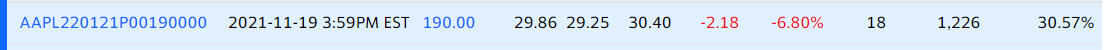

In [13]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014394552271822106, 0.01921353682796255)

In [14]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0017/360 # Tasa diaria

In [15]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,97,98,99
2021-11-20,159.859,164.805,155.658,...,162.916,152.525,162.743
2021-11-21,160.433,168.820,152.647,...,161.576,157.736,169.627
2021-11-22,157.494,173.563,156.861,...,156.726,152.885,165.968
2021-11-23,154.967,170.478,157.757,...,159.163,155.846,169.606
2021-11-24,154.326,166.968,158.627,...,163.447,156.587,169.488
...,...,...,...,...,...,...,...
2021-12-30,155.116,178.844,204.285,...,179.434,170.643,161.760
2021-12-31,151.523,178.503,211.351,...,188.936,167.156,162.826
2022-01-01,153.739,176.522,219.205,...,189.989,168.952,160.513
2022-01-02,155.269,174.952,217.072,...,190.426,167.786,162.979


In [16]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,97,98,99
2021-11-20,-0.007,0.005,-0.022,...,-0.027,0.006,-0.006
2021-11-21,-0.008,0.002,-0.036,...,-0.007,-0.032,-0.020
2021-11-22,-0.029,-0.014,-0.009,...,-0.002,0.002,-0.019
2021-11-23,-0.021,-0.019,-0.002,...,-0.007,0.002,-0.029
2021-11-24,-0.040,-0.012,0.019,...,0.005,-0.019,-0.031
...,...,...,...,...,...,...,...
2021-12-30,-0.038,-0.140,0.221,...,-0.006,-0.141,0.038
2021-12-31,-0.046,-0.110,0.197,...,-0.019,-0.161,0.009
2022-01-01,-0.060,-0.105,0.183,...,-0.034,-0.164,0.015
2022-01-02,-0.052,-0.115,0.196,...,-0.035,-0.150,0.019


In [17]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,97,98,99
2021-11-20,159.508,161.396,157.110,...,156.199,161.534,159.617
2021-11-21,159.323,160.803,154.849,...,159.501,155.528,157.445
2021-11-22,155.901,158.299,159.095,...,160.256,160.875,157.576
2021-11-23,157.254,157.487,160.263,...,159.399,160.827,155.954
2021-11-24,154.244,158.598,163.695,...,161.313,157.508,155.586
...,...,...,...,...,...,...,...
2021-12-30,154.488,139.555,200.180,...,159.576,139.369,166.758
2021-12-31,153.352,143.773,195.528,...,157.551,136.625,161.985
2022-01-01,151.162,144.506,192.812,...,155.218,136.303,162.953
2022-01-02,152.445,143.171,195.408,...,155.033,138.153,163.616


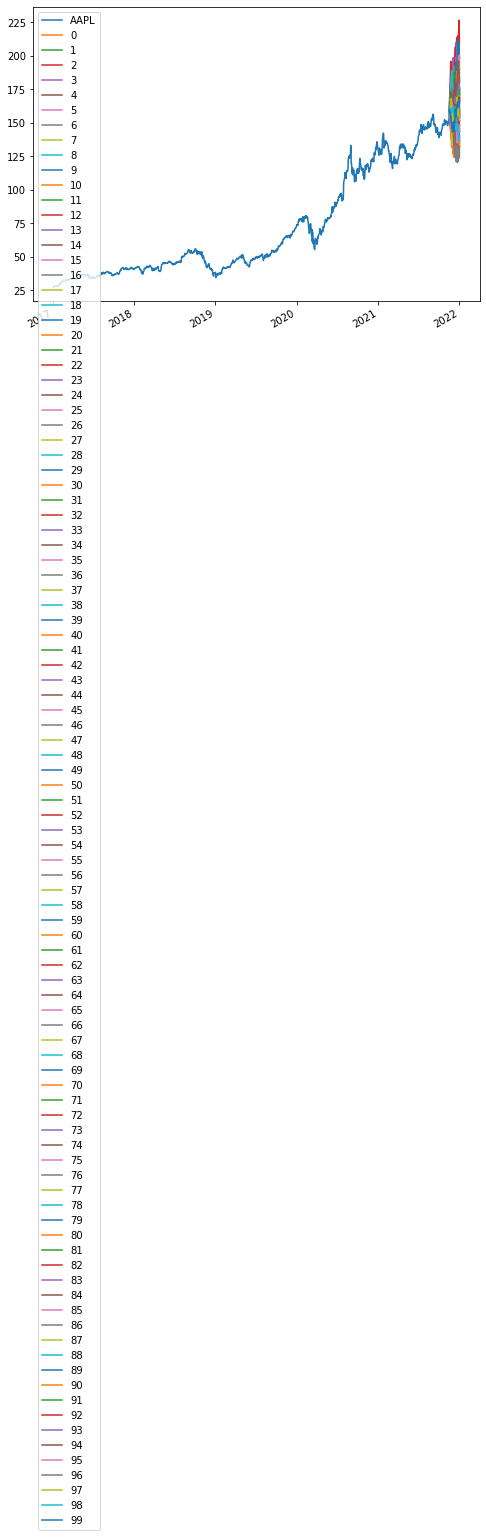

In [18]:
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [19]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-20,162.540,163.422,157.511,...,162.818,158.214,158.620
2021-11-21,162.508,161.885,164.736,...,165.386,156.444,158.370
2021-11-22,160.731,163.945,166.536,...,165.751,153.923,160.238
2021-11-23,162.182,161.006,170.489,...,164.021,148.217,159.711
2021-11-24,159.191,160.305,166.536,...,165.921,151.053,163.446
...,...,...,...,...,...,...,...
2021-12-30,146.499,160.809,164.548,...,161.015,172.202,148.320
2021-12-31,145.253,159.918,162.591,...,157.869,171.046,142.440
2022-01-01,150.815,153.401,165.560,...,158.723,168.510,141.878
2022-01-02,145.270,154.193,168.254,...,155.290,174.347,143.939


In [20]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-20,NaN,NaN,NaN,...,NaN,NaN,NaN
2021-11-21,162.508,161.885,164.736,...,165.386,156.444,158.370
2021-11-22,160.731,163.945,166.536,...,165.751,153.923,160.238
2021-11-23,162.182,161.006,170.489,...,164.021,148.217,159.711
2021-11-24,159.191,160.305,166.536,...,165.921,151.053,163.446
...,...,...,...,...,...,...,...
2021-12-30,146.499,160.809,164.548,...,161.015,172.202,148.320
2021-12-31,145.253,159.918,162.591,...,157.869,171.046,142.440
2022-01-01,150.815,153.401,165.560,...,158.723,168.510,141.878
2022-01-02,145.270,154.193,168.254,...,155.290,174.347,143.939


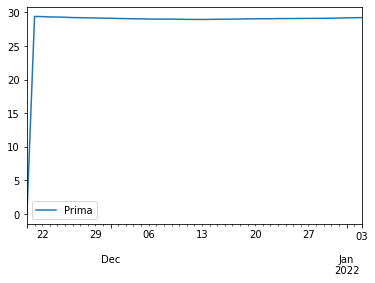

In [21]:
strike = 190
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
call.plot();

In [22]:
call.iloc[-1]

Prima    29.199
Name: 2022-01-03 00:00:00, dtype: float64

In [23]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(29.027915577767722, 29.370713664924722)
(29.02791884933172, 29.370710393360724)


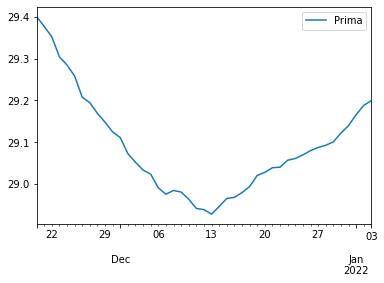

In [24]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

In [25]:
call.iloc[-1]

Prima    29.199
Name: 2022-01-03 00:00:00, dtype: float64

In [26]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(29.027915577767722, 29.370713664924722)
(29.027915577767722, 29.370713664924722)


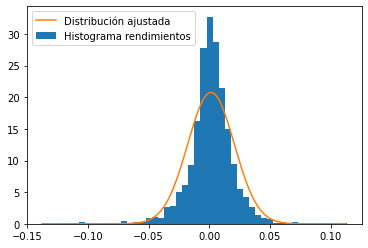

In [27]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


In [28]:
ndays = 109 
nscen = 10

In [29]:
prob = y/np.sum(y)
values = x[1:]

In [30]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-11-20,0.008,-0.022,0.043,...,0.008,0.013,0.043
2021-11-21,0.013,0.028,0.018,...,0.008,-0.017,0.013
2021-11-22,0.003,-0.007,-0.002,...,0.038,0.028,0.028
2021-11-23,0.008,0.023,0.003,...,0.008,-0.007,0.013
2021-11-24,-0.007,0.003,-0.022,...,0.013,0.018,-0.032
...,...,...,...,...,...,...,...
2022-03-04,0.018,0.008,-0.032,...,0.008,-0.017,0.003
2022-03-05,0.033,0.023,0.003,...,-0.027,-0.007,0.023
2022-03-06,0.013,-0.002,0.043,...,0.023,0.008,0.013
2022-03-07,0.003,0.008,0.008,...,0.018,-0.002,0.008


In [31]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-11-20,161.806,157.008,167.590,...,161.806,162.620,167.590
2021-11-21,163.893,161.444,170.605,...,163.072,159.832,169.751
2021-11-22,164.348,160.277,170.223,...,169.371,164.348,174.547
2021-11-23,165.634,163.980,170.696,...,170.696,163.160,176.798
2021-11-24,164.436,164.436,166.930,...,172.897,166.095,171.171
...,...,...,...,...,...,...,...
2022-03-04,189.564,247.310,258.733,...,222.578,199.317,256.150
2022-03-05,195.900,253.025,259.453,...,216.578,197.876,262.069
2022-03-06,198.426,252.459,270.830,...,221.583,199.424,265.448
2022-03-07,198.978,254.434,272.949,...,225.569,198.978,267.525


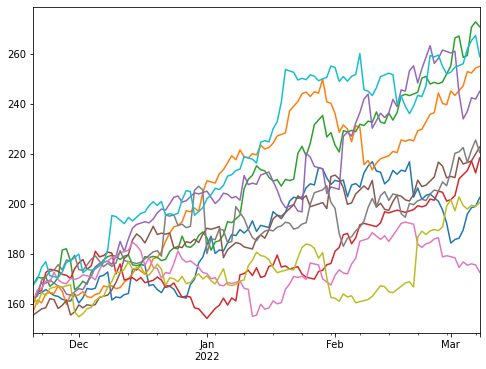

In [32]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

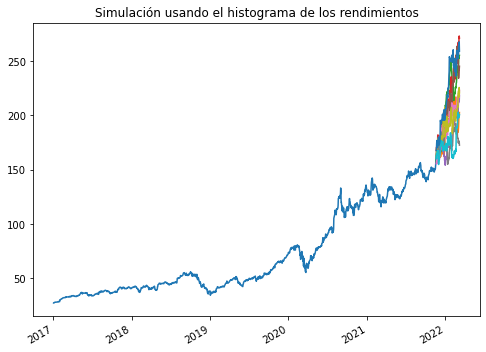

In [33]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [34]:
K=190
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

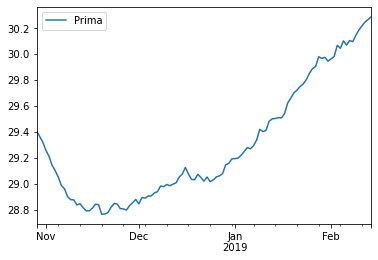

In [35]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [36]:
call_hist.iloc[-1]

Prima    30.288
Name: 2019-02-14 00:00:00, dtype: float64

In [37]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(29.651822256423603, 30.924453486119607)
(29.651822256423603, 30.924453486119607)


Black Scholes

In [47]:
np.exp

<ufunc 'exp'>

In [56]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [58]:
stock = 'AAPL'
expiry = '01-21-2022'
strike_price = 190

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = web.DataReader(stock, 'yahoo', one_year_ago, today)

df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('El precio de la opcción es: ', bs_put(lcp, strike_price, t, uty, sigma))

The Option Price is:  29.331224070815175


Comparando el método vemos que nos arroja BS = 29.33
Mientras que los anteriores = 30.288 y 29.199
Lo cual vemos que todos los métodos dan aproximaciones bastante buenas 
Ya que el real osila en este rango tambien 

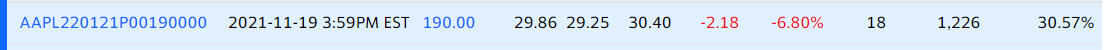

# Código Jose

In [38]:
# Código Jose